In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv("BrainAllometry_Supplement_Data.csv")

In [5]:
dataset.head()

,Binomial,order,family,genus,species,Sample_size.brain,Sample_size.body,Sex,Mean_brain_mass_g,Mean_body_mass_g,BrainReference1,BrainReference2,Brain.resid,T_resid
0,Chrysochloris_stuhlmanni,Afrosoricida,Chrysochloridae,Chrysochloris,stuhlmanni,">2,<12",NaN,Both,1.06,50.05,Boddy2012,Stephanetal.1981; Mace.etal.1981,0.010717,0.172364
1,Microgale_cowani,Afrosoricida,Tenrecidae,Microgale,cowani,1,NaN,NaN,0.42,15.20,Boddy2012,Stephanetal.1981,-0.003165,0.041996
2,Microgale_dobsoni,Afrosoricida,Tenrecidae,Microgale,dobsoni,1,NaN,NaN,0.56,32.60,Boddy2012,Stephanetal.1981,-0.126759,-0.007017
3,Oryzorictes_hova,Afrosoricida,Tenrecidae,Oryzorictes,hova,1,NaN,NaN,0.58,44.20,Boddy2012,Stephanetal.1981,-0.210674,-0.061177
4,Echinops_telfairi,Afrosoricida,Tenrecidae,Echinops,telfairi,2,NaN,NaN,0.62,87.50,Boddy2012,Stephanetal.1981,-0.404152,-0.187903


In [6]:
dataset.shape

(1552, 14)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Binomial           1552 non-null   object 
 1   order              1552 non-null   object 
 2   family             1552 non-null   object 
 3   genus              1552 non-null   object 
 4   species            1552 non-null   object 
 5   Sample_size.brain  1010 non-null   object 
 6   Sample_size.body   217 non-null    object 
 7   Sex                808 non-null    object 
 8   Mean_brain_mass_g  1552 non-null   float64
 9   Mean_body_mass_g   1552 non-null   float64
 10  BrainReference1    1552 non-null   object 
 11  BrainReference2    586 non-null    object 
 12  Brain.resid        1552 non-null   float64
 13  T_resid            1504 non-null   float64
dtypes: float64(4), object(10)
memory usage: 169.9+ KB


In [8]:
dataset.isnull().any()

Binomial             False
order                False
family               False
genus                False
species              False
Sample_size.brain     True
Sample_size.body      True
Sex                   True
Mean_brain_mass_g    False
Mean_body_mass_g     False
BrainReference1      False
BrainReference2       True
Brain.resid          False
T_resid               True
dtype: bool

In [9]:
dataset.nunique()

# dataset.family.unique()

Binomial             1552
order                  28
family                136
genus                 694
species              1259
Sample_size.brain      81
Sample_size.body       51
Sex                     6
Mean_brain_mass_g    1226
Mean_body_mass_g     1269
BrainReference1        30
BrainReference2       113
Brain.resid          1548
T_resid              1502
dtype: int64

In [33]:
primates = dataset.loc[dataset["order"] == "Primates"]
data = primates[["Mean_body_mass_g", "Mean_brain_mass_g"]]
X = data.sample(frac=0.8, random_state=0)
Y = data.drop(X.index)
X.tail(), Y.tail()

(      Mean_body_mass_g  Mean_brain_mass_g
 944             764.00          11.495758
 1099            476.00           8.900000
 1030           3430.00         108.960000
 1079            429.00           7.200000
 1067           6611.04          59.083333,
       Mean_body_mass_g  Mean_brain_mass_g
 1146            6695.0               80.3
 1149           11600.0               84.6
 1152           10130.0               88.3
 1156            8030.0               96.8
 1160            8840.0              119.4)

In [46]:
X.columns.tolist()

['Mean_body_mass_g', 'Mean_brain_mass_g']

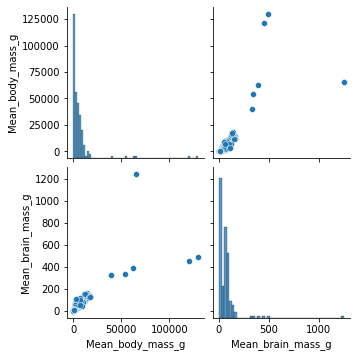

In [47]:
sns.pairplot(X[X.columns.tolist()])

In [63]:
primates.loc[primates["Mean_brain_mass_g"] < 1300].loc[primates["Mean_brain_mass_g"] > 160].shape

(8, 14)